###  <u> *EDA Features Importance for severity and frequency*  </u>

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os

In [6]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Auto_Insurance/Data_Sets/new_cleaned_df.csv")
df.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,severity,frequincy,pure_premium
0,1060.0,0.303901,0,0,0.0,HBACK,3,F,C,2,0.0,0.0,0.0
1,1030.0,0.648871,0,0,0.0,HBACK,2,F,A,4,0.0,0.0,0.0
2,3260.0,0.569473,0,0,0.0,UTE,2,F,E,2,0.0,0.0,0.0
3,4140.0,0.317591,0,0,0.0,STNWG,2,F,D,2,0.0,0.0,0.0
4,720.0,0.648871,0,0,0.0,HBACK,4,F,C,2,0.0,0.0,0.0


---


### *A.* <u>*Apply mutual_info_regression*</u>

In [58]:
df2=df.copy()
df3=df.copy()


In [59]:
df2=df2[['veh_value', 'veh_body','veh_age', 'gender', 'area', 'agecat', 'severity']]
df3=df3[['veh_value', 'exposure', 'veh_body','veh_age', 'gender', 'area', 'agecat', 'numclaims']]

* ####  <u>  <u>*Create mutual_info_regression Function :*</u>

In [60]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

* ####  <u> *severity as a Target Feature :*  </u>

In [61]:
X_1 = df2.copy()
y_1= X_1.pop("severity")
# Label encoding for categoricals
for colname in X_1.select_dtypes("object"):
    X_1[colname], _ = X_1[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_1 = X_1.dtypes == int

* ####  <u> *Number of Claims as a Target Feature :*  </u>

In [62]:
X_2 = df3.copy()
y_2= X_2.pop("numclaims")
# Label encoding for categoricals
for colname in X_2.select_dtypes("object"):
    X_2[colname], _ = X_2[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_2 = X_2.dtypes == int

* ####  <u>  <u>*Apply mutual_info_regression Function :*</u>

In [63]:
mi_scores_1 = make_mi_scores(X_1, y_1, discrete_features_1)
mi_scores_2 = make_mi_scores(X_2, y_2, discrete_features_2)

In [64]:
print(f"\n Faetures Importance for Severity Feature:\n {mi_scores_1}")  # show a few features with their MI scores

print(f"\n Faetures Importance for number of claims Feature:\n {mi_scores_2}")  # show a few features with their MI scores


 Faetures Importance for Severity Feature:
 area         0.007670
agecat       0.002226
gender       0.001414
veh_value    0.001119
veh_body     0.000033
veh_age      0.000000
Name: MI Scores, dtype: float64

 Faetures Importance for number of claims Feature:
 agecat       0.005477
exposure     0.005359
area         0.002543
veh_value    0.000000
veh_body     0.000000
veh_age      0.000000
gender       0.000000
Name: MI Scores, dtype: float64


* ####  <u>  <u>*Visualize mutual_info_regression results :*</u>

In [65]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

Text(0.5, 1.0, 'number of claims Mutual Information Scores')

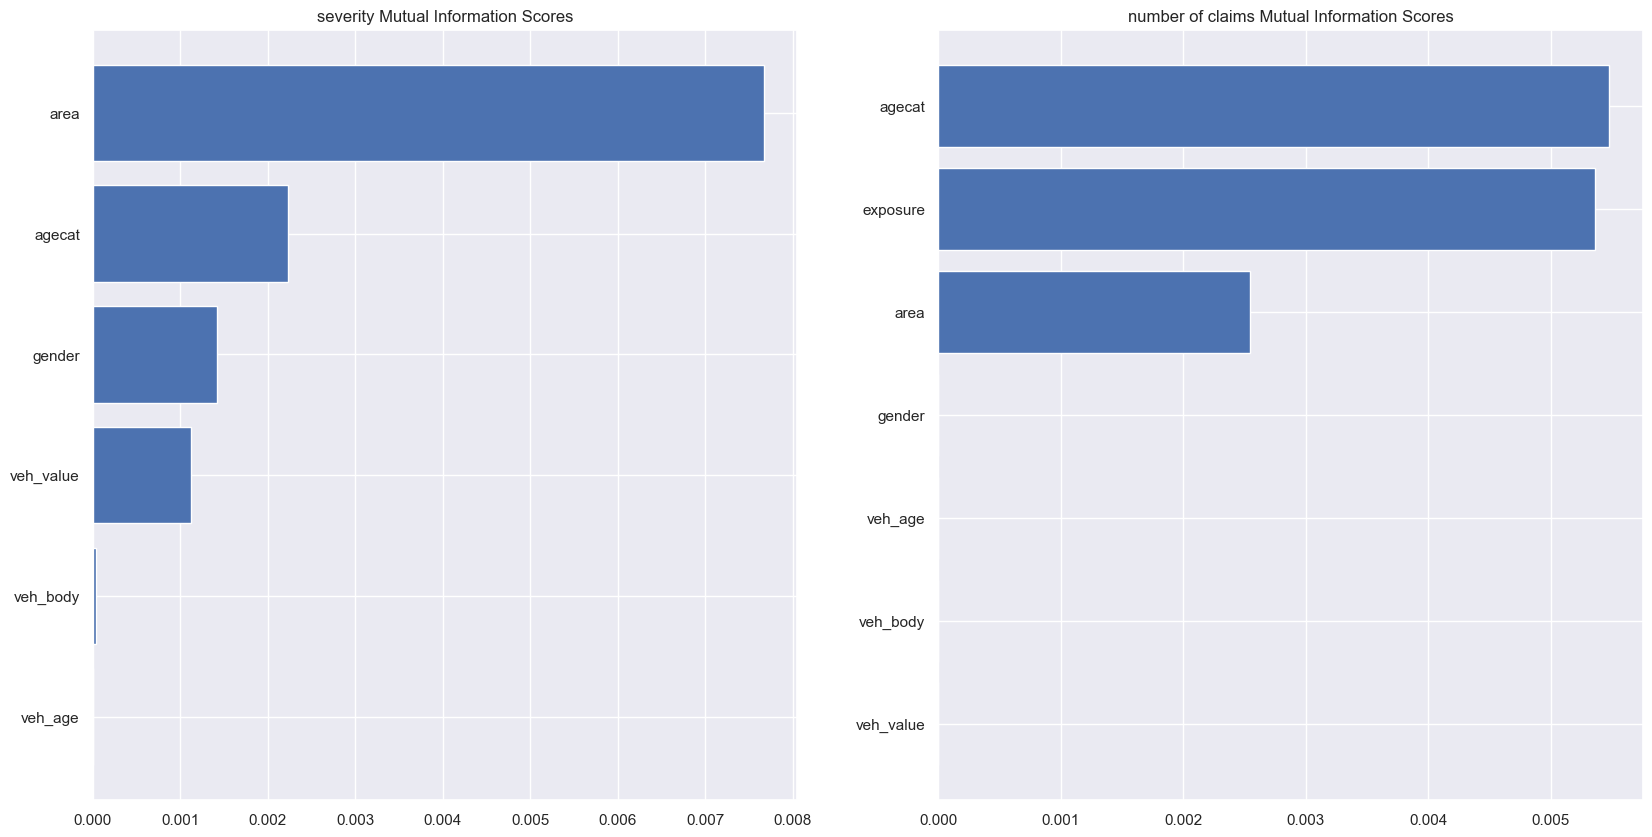

In [66]:
plt.subplot(121)
plot_mi_scores(mi_scores_1)
plt.title("severity Mutual Information Scores")
plt.subplot(122)
plot_mi_scores(mi_scores_2)
plt.title("number of claims Mutual Information Scores")

---